#  Regression

<IPython.core.display.Javascript object>


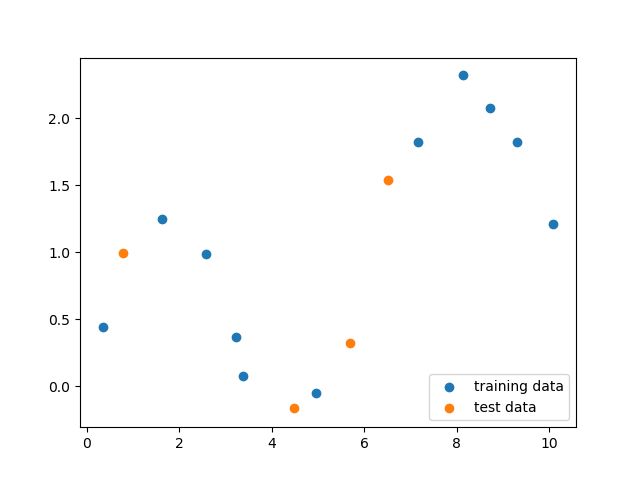

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

%matplotlib notebook
plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X_train.reshape(11,1))
X_poly.shape

(11, 3)

In [5]:
np.linspace(0,10,100).shape

(100,)

In [6]:
poly.fit_transform(np.linspace(0,10,100).reshape(100,1)).shape

(100, 3)

In [7]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
result = np.zeros((4, 100))
for i, degree in enumerate([1, 3, 6, 9]):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train.reshape(11,1))
    linreg = LinearRegression().fit(X_poly, y_train)
    y = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)))
    result[i, :] = y
result

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

<IPython.core.display.Javascript object>


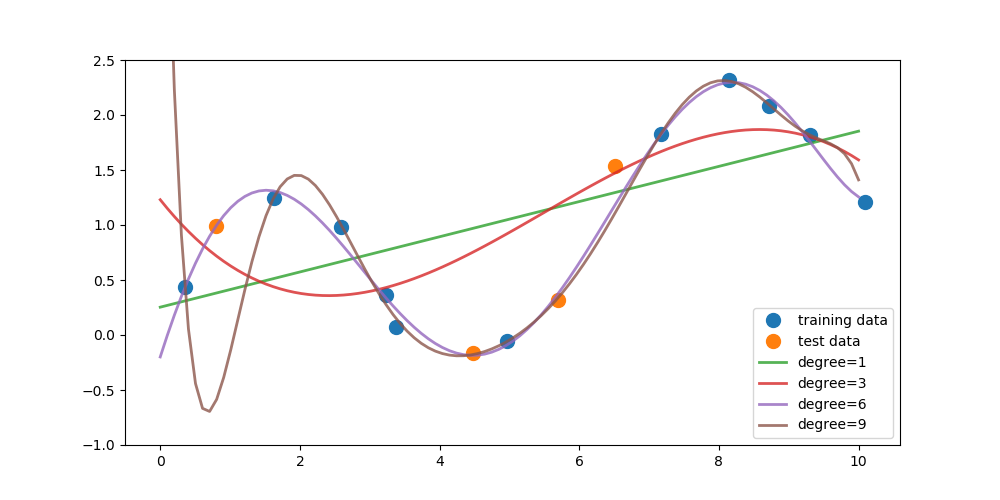

In [9]:

plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100), result[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)


In [10]:
X_test

array([0.79431716, 4.47573197, 5.69364194, 6.51069113])

In [14]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score
r2_train = np.zeros(10)
r2_test = np.zeros(10)
for degree in range(10):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train.reshape(11,1))
    linreg = LinearRegression().fit(X_poly, y_train)
    r2_train[degree] = r2_score(y_train,linreg.predict(X_poly))
    X_test_poly = poly.fit_transform(X_test.reshape(4,1))
    r2_test[degree] =r2_score(y_test,linreg.predict(X_test_poly))
(r2_train, r2_test)

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524777]))


*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [15]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


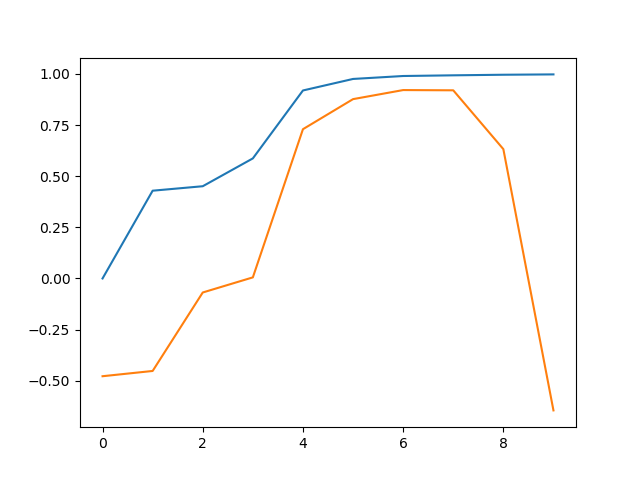

In [17]:
degrees = np.arange(0, 10)
plt.figure()
plt.plot(degrees, r2_train, degrees, r2_test)

# LinearRegression & Lasso

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics.regression import r2_score
poly = PolynomialFeatures(12)
X_poly = poly.fit_transform(X_train.reshape(11,1))
X_test_poly = poly.fit_transform(X_test.reshape(4,1))
linreg = LinearRegression().fit(X_poly, y_train)
LinearRegression_R2_test_score = linreg.score(X_test_poly, y_test)
linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_poly, y_train)
Lasso_R2_test_score = linlasso.score(X_test_poly, y_test)
(LinearRegression_R2_test_score, Lasso_R2_test_score)

C:\Users\admin\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.311980555741178, 0.8406625614750356)

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

###  DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train2, y_train2)
clf.feature_importances_
X_train2.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [21]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train2, y_train2)
features = []
for feature, importance in zip(X_train2.columns, clf.feature_importances_):
       features.append((importance, feature))
features.sort(reverse=True)
[feature[1] for feature in features[:5]]

['odor_n',
 'stalk-root_c',
 'stalk-surface-below-ring_y',
 'spore-print-color_r',
 'odor_l']

### SVM


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
    
svc = SVC(random_state=0)
gamma = np.logspace(-4,1,6)
train_scores, test_scores = validation_curve(svc,X_subset,y_subset, param_name='gamma',param_range=gamma,scoring='accuracy')
train_scores = train_scores.mean(axis=1)
test_scores = test_scores.mean(axis=1)
train_scores, test_scores

(array([0.56647847, 0.93155951, 0.99039881, 1.        , 1.        ,
        1.        ]),
 array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
        0.52240279]))

### (Underfitting, Overfitting, Good_Generalization)

<IPython.core.display.Javascript object>


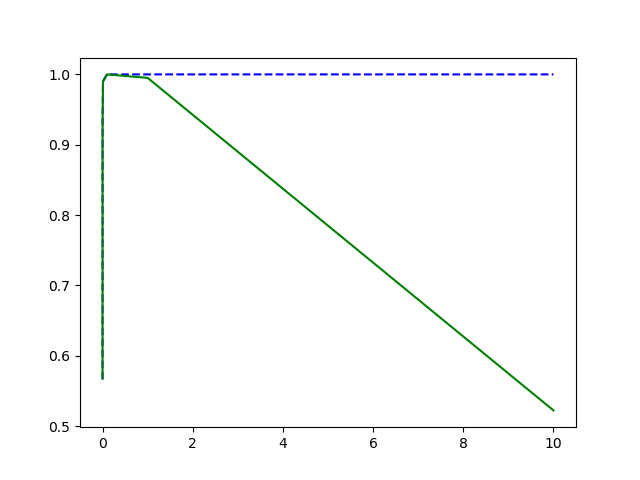

In [23]:
gamma = np.logspace(-4,1,6)
plt.figure()
plt.plot(gamma, train_scores, 'b--', gamma, test_scores, 'g-')